In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def read_excel_sheets(xls_path):
    """Read all sheets of an Excel workbook and return a single DataFrame"""
    print(f'Loading {xls_path} into pandas')
    xl = pd.ExcelFile(xls_path)
    df = pd.DataFrame()
    columns = None
    for idx, name in enumerate(xl.sheet_names):
        print(f'Reading sheet #{idx}: {name}')
        sheet = xl.parse(name)
        if idx == 0:
            # Save column names from the first sheet to match for append
            columns = sheet.columns
        sheet.columns = columns
        # Assume index of existing data frame when appended
        df = df.append(sheet, ignore_index=True)
    return df

In [25]:
data = pd.read_csv("Data/sea-impacts.csv")


In [26]:
data.dropna()
data.head()

,Country Code,Country Name,Total Area (Sq. km.),1 meter,2 meter,3 meter,4 meter,5 meter,1 meter.1,2 meter.1,3 meter.1,4 meter.1,5 meter.1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Global,"47,70,864","97,497","1,50,403","2,17,177","2,96,901","3,64,625",2.04,3.15,4.55,6.22,7.64
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Latin America / Caribbean,"16,51,735","22,956","39,438","61,562","86,575","1,09,378",1.39,2.39,3.73,5.24,6.62
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
data.head()
print(data)

    Country Code               Country Name Total Area (Sq. km.) 1 meter  \
0            NaN                        NaN                  NaN     NaN   
1            NaN                     Global            47,70,864  97,497   
2            NaN                        NaN                  NaN     NaN   
3            NaN  Latin America / Caribbean            16,51,735  22,956   
4            NaN                        NaN                  NaN     NaN   
..           ...                        ...                  ...     ...   
100          NaN                        NaN                  NaN     NaN   
101          BGD                 Bangladesh               105971    1451   
102          LKA                  Sri Lanka                 7119     140   
103          IND                      India               432883    5606   
104          PAK                   Pakistan                33157    3038   

      2 meter   3 meter   4 meter   5 meter  1 meter.1  2 meter.1  3 meter.1  \
0      

In [28]:
latin_land = data.loc[5:30,["Country Name","1 meter","4 meter"]]
latin_land = latin_land.sort_values(by=['1 meter'],ascending=False)
latin_land.reset_index(drop=True,inplace=True)
latin_land = latin_land.loc[1:10,:]
print(latin_land)

   Country Name 1 meter 4 meter
1       Bahamas     898    3251
2   El Salvador       8      12
3       Jamaica      77     138
4        Brazil    7370   35450
5       Uruguay     691    1354
6        Belize      68     139
7      Suriname     636    2408
8    Costa Rica      63     258
9        Mexico    5014   11739
10  Puerto Rico       5       7


In [40]:
middle_land = data.loc[34:47,["Country Name","1 meter","4 meter"]]
middle_land = middle_land.sort_values(by=['1 meter'],ascending=False)
middle_land.reset_index(drop=True,inplace=True)
middle_land = middle_land.loc[1:10,:]
print(middle_land)

            Country Name 1 meter 4 meter
1                 Kuwait      78     194
2                  Libya    5708    6101
3   United Arab Emirates     441    1526
4                Algeria    4043    4203
5                Morocco     377     547
6                  Yemen     209     530
7                   Oman     206     433
8                   Iran    1877    5928
9                  Qatar     169     509
10          Saudi Arabia    1671    3901


In [30]:
east_asia_land = data.loc[84:97,["Country Name","1 meter","4 meter"]]
east_asia_land = east_asia_land.sort_values(by=['1 meter'],ascending=False)
east_asia_land.reset_index(drop=True,inplace=True)
east_asia_land = east_asia_land.loc[1:10,:]
print(east_asia_land)

        Country Name 1 meter 4 meter
1        South Korea      64     204
2           Cambodia     610    2945
3        North Korea      43     333
4        Philippines     398    1809
5    Myanmar (Burma)    3817   18674
6           Malaysia     353    1317
7             Brunei       3       9
8   Papua New Guinea     287     960
9          Indonesia    2278   11368
10      Taiwan China      20      46


In [31]:
south_asia_land = data.loc[101:105,["Country Name","1 meter","4 meter"]]
south_asia_land = south_asia_land.sort_values(by=['1 meter'],ascending=False)
south_asia_land.reset_index(drop=True,inplace=True)
south_asia_land = south_asia_land.loc[0:3,:]
print(south_asia_land)

  Country Name 1 meter 4 meter
0        India    5606   19513
1     Pakistan    3038   11726
2   Bangladesh    1451    8851
3    Sri Lanka     140     749


<br>

## Part 1: South America

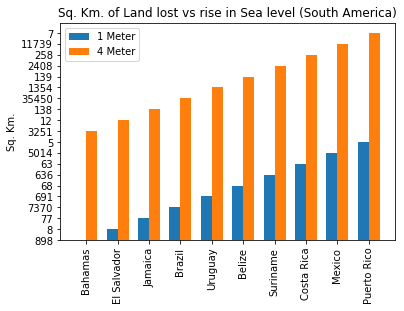

In [32]:
#South America - Land Lost
x =np.arange(len(list(latin_land["Country Name"] )))
width=0.35


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, latin_land["1 meter"], width, label='1 Meter')
rects2 = ax.bar(x + width/2, latin_land["4 meter"], width, label='4 Meter')


ax.set_ylabel('Sq. Km.')
ax.set_title("Sq. Km. of Land lost vs rise in Sea level (South America)")
ax.set_xticks(x)

ax.set_xticklabels(list(latin_land["Country Name"] ))
ax.legend()

plt.xticks(rotation=90)
plt.show()

In [36]:
print(latin_land["1 meter"])
print(latin_land["4 meter"])
print(list(latin_land["Country Name"] ))

1      898
2        8
3       77
4     7370
5      691
6       68
7      636
8       63
9     5014
10       5
Name: 1 meter, dtype: object
1      3251
2        12
3       138
4     35450
5      1354
6       139
7      2408
8       258
9     11739
10        7
Name: 4 meter, dtype: object
['Bahamas', 'El Salvador', 'Jamaica', 'Brazil', 'Uruguay', 'Belize', 'Suriname', 'Costa Rica', 'Mexico', 'Puerto Rico']


In [37]:
south_america = pd.DataFrame()
south_america["Country"] = list(latin_land["Country Name"] )
south_america["1 meter"] = latin_land["1 meter"]
south_america["4 meters"] = latin_land["4 meter"]
south_america.to_csv("south_america_sea.csv")

<br>

# Part 2: Middle East

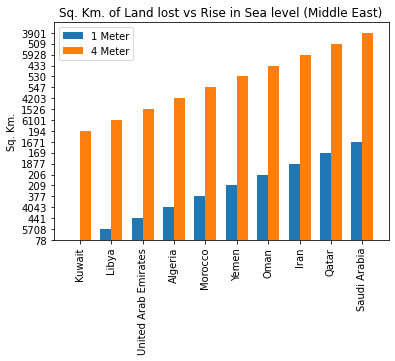

In [39]:
#Middle East - Land Lost
x =np.arange(len(list(middle_land["Country Name"] )))
width=0.35


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, middle_land["1 meter"], width, label='1 Meter')
rects2 = ax.bar(x + width/2, middle_land["4 meter"], width, label='4 Meter')


ax.set_ylabel('Sq. Km.')
ax.set_title("Sq. Km. of Land lost vs Rise in Sea level (Middle East)")
ax.set_xticks(x)

ax.set_xticklabels(list(middle_land["Country Name"] ))
ax.legend()

plt.xticks(rotation=90)
plt.show()

In [41]:
print(middle_land["1 meter"])
print(middle_land["4 meter"])
print(list(middle_land["Country Name"] ))

1       78
2     5708
3      441
4     4043
5      377
6      209
7      206
8     1877
9      169
10    1671
Name: 1 meter, dtype: object
1      194
2     6101
3     1526
4     4203
5      547
6      530
7      433
8     5928
9      509
10    3901
Name: 4 meter, dtype: object
['Kuwait', 'Libya', 'United Arab Emirates', 'Algeria', 'Morocco', 'Yemen', 'Oman', 'Iran', 'Qatar', 'Saudi Arabia']


In [48]:
middle = pd.DataFrame()
middle["Country"] = list(middle_land["Country Name"] )
middle["1 meter"] = list(middle_land["1 meter"])
middle["4 meters"] = list(middle_land["4 meter"])
#print(middle)
middle.to_csv("middle_land.csv")

<br>

## Part 3: East Asia

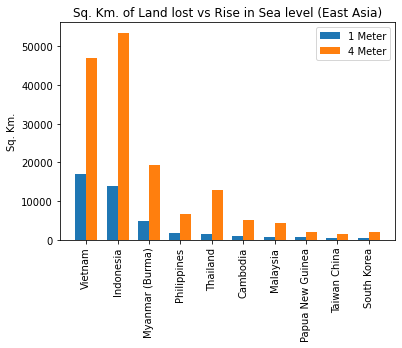

In [11]:
#East Asia - Land Lost
x =np.arange(len(list(east_asia_land["Country Name"] )))
width=0.35


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, east_asia_land["1 meter"], width, label='1 Meter')
rects2 = ax.bar(x + width/2, east_asia_land["4 meter"], width, label='4 Meter')


ax.set_ylabel('Sq. Km.')
ax.set_title("Sq. Km. of Land lost vs Rise in Sea level (East Asia)")
ax.set_xticks(x)

ax.set_xticklabels(list(east_asia_land["Country Name"] ))
ax.legend()

plt.xticks(rotation=90)
plt.show()

In [49]:
east = pd.DataFrame()
east["Country"] = list(east_asia_land["Country Name"] )
east["1 meter"] = list(east_asia_land["1 meter"])
east["4 meters"] = list(east_asia_land["4 meter"])
#print(middle)
east.to_csv("east_sea.csv")

<br>

## Part 4: South Asia

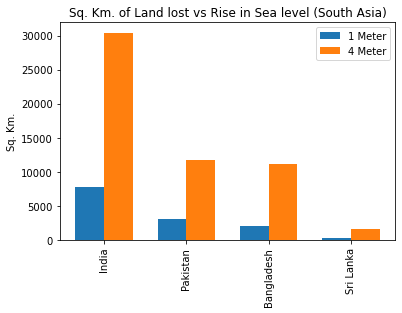

In [12]:
#South Asia - Land Lost
x =np.arange(len(list(south_asia_land["Country Name"] )))
width=0.35


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, south_asia_land["1 meter"], width, label='1 Meter')
rects2 = ax.bar(x + width/2, south_asia_land["4 meter"], width, label='4 Meter')


ax.set_ylabel('Sq. Km.')
ax.set_title("Sq. Km. of Land lost vs Rise in Sea level (South Asia)")
ax.set_xticks(x)

ax.set_xticklabels(list(south_asia_land["Country Name"] ))
ax.legend()

plt.xticks(rotation=90)
plt.show()

In [50]:
south = pd.DataFrame()
south["Country"] = list(south_asia_land["Country Name"] )
south["1 meter"] = list(south_asia_land["1 meter"])
south["4 meters"] = list(south_asia_land["4 meter"])
#print(middle)
south.to_csv("south_sea.csv")

In [13]:
latin_pop = data.loc[110:134,["Country Name","Country Area (Sq. km.)","1 meter","4 meter"]]
latin_pop.reset_index(drop=True,inplace=True)
latin_pop.columns = ["Country Name","Total Population","1 meter","4 meter"]
latin_pop = latin_pop.loc[1:10,:]
print(latin_pop)

          Country Name  Total Population    1 meter    4 meter
1         Bahamas, The          304000.0    13869.0    54722.0
2               Belize          226000.0     5532.0    33676.0
3               Brazil       170406000.0  1026618.0  3969403.0
4                Chile        15211000.0    39615.0    71714.0
5             Colombia        42105000.0   142888.0   522346.0
6           Costa Rica         4024000.0     5152.0    23440.0
7                 Cuba        11199000.0    77460.0   294205.0
8   Dominican Republic         8373000.0    27631.0   133827.0
9              Ecuador        12646000.0   137539.0   483380.0
10         El Salvador         6278000.0     9920.0    36612.0


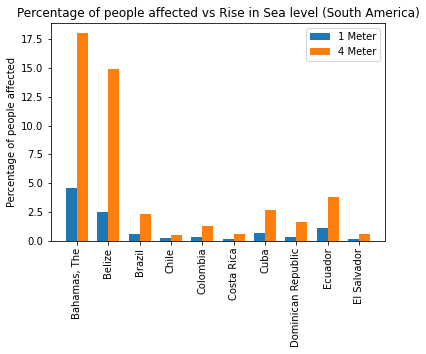

In [14]:
#South America - Population Affected

latin_pop["1 meter Percentage"] = (latin_pop["1 meter"]/latin_pop["Total Population"])*100
latin_pop["4 meter Percentage"] = (latin_pop["4 meter"]/latin_pop["Total Population"])*100
x =np.arange(len(list(latin_pop["Country Name"] )))
width=0.35


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, latin_pop["1 meter Percentage"], width, label='1 Meter')
rects2 = ax.bar(x + width/2, latin_pop["4 meter Percentage"], width, label='4 Meter')


ax.set_ylabel('Percentage of people affected')
ax.set_title("Percentage of people affected vs Rise in Sea level (South America)")
ax.set_xticks(x)

ax.set_xticklabels(list(latin_pop["Country Name"] ))
ax.legend()

plt.xticks(rotation=90)
plt.show()

In [15]:
middle_pop = data.loc[139:151,["Country Name","Country Area (Sq. km.)","1 meter","4 meter"]]
middle_pop.reset_index(drop=True,inplace=True)
middle_pop.columns = ["Country Name","Total Population","1 meter","4 meter"]
middle_pop = middle_pop.loc[1:10,:]
print(middle_pop)

            Country Name  Total Population    1 meter     4 meter
1                  Egypt        67884000.0  6296292.0  12017374.0
2                   Iran        70330000.0   240354.0    722502.0
3                 Kuwait         1914000.0    11429.0     27600.0
4                  Libya         5290000.0   156820.0    290829.0
5                Morocco        29634000.0   380844.0    663212.0
6                   Oman         2538000.0    27252.0     85497.0
7                  Qatar          565000.0     9051.0     41576.0
8           Saudi Arabia        20346000.0   403036.0   1102031.0
9   United Arab Emirates         2606000.0   119581.0    255431.0
10               Tunisia         9459000.0   462490.0    772427.0


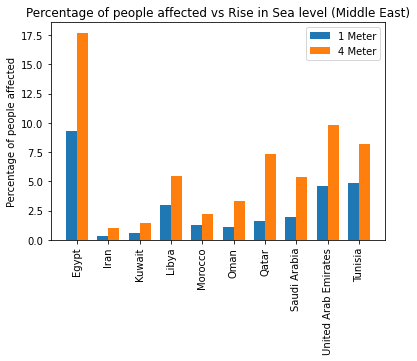

In [16]:
#South America - Population Affected

middle_pop["1 meter Percentage"] = (middle_pop["1 meter"]/middle_pop["Total Population"])*100
middle_pop["4 meter Percentage"] = (middle_pop["4 meter"]/middle_pop["Total Population"])*100
x =np.arange(len(list(middle_pop["Country Name"] )))
width=0.35


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, middle_pop["1 meter Percentage"], width, label='1 Meter')
rects2 = ax.bar(x + width/2, middle_pop["4 meter Percentage"], width, label='4 Meter')


ax.set_ylabel('Percentage of people affected')
ax.set_title("Percentage of people affected vs Rise in Sea level (Middle East)")
ax.set_xticks(x)

ax.set_xticklabels(list(middle_pop["Country Name"] ))
ax.legend()

plt.xticks(rotation=90)
plt.show()

In [17]:
east_asia_pop = data.loc[188:201,["Country Name","Country Area (Sq. km.)","1 meter","4 meter"]]
east_asia_pop.reset_index(drop=True,inplace=True)
east_asia_pop.columns = ["Country Name","Total Population","1 meter","4 meter"]
east_asia_pop = east_asia_pop.loc[1:10,:]
print(east_asia_pop)

        Country Name  Total Population     1 meter     4 meter
1    Myanmar (Burma)      4.774900e+07    591118.0   3964937.0
2             Brunei      3.280000e+05      1584.0      4310.0
3           Cambodia      1.310400e+07    130478.0    845556.0
4              China      1.275133e+09  22699295.0  69240818.0
5          Indonesia      2.120920e+08   2774692.0  12459289.0
6        North Korea      2.226800e+07     86211.0    601995.0
7        South Korea      4.674000e+07    228762.0    886687.0
8           Malaysia      2.221800e+07     97384.0    934249.0
9   Papua New Guinea      4.809000e+06      4963.0     13799.0
10       Philippines      7.565300e+07    805406.0   4821392.0


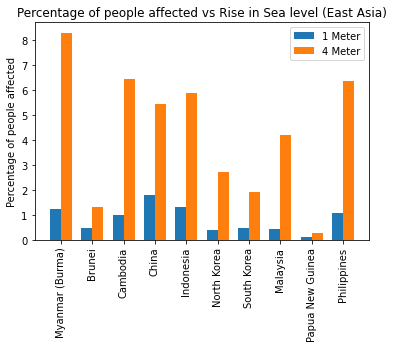

In [18]:
#East Asia - Population Affected

east_asia_pop["1 meter Percentage"] = (east_asia_pop["1 meter"]/east_asia_pop["Total Population"])*100
east_asia_pop["4 meter Percentage"] = (east_asia_pop["4 meter"]/east_asia_pop["Total Population"])*100
x =np.arange(len(list(east_asia_pop["Country Name"] )))
width=0.35


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, east_asia_pop["1 meter Percentage"], width, label='1 Meter')
rects2 = ax.bar(x + width/2, east_asia_pop["4 meter Percentage"], width, label='4 Meter')


ax.set_ylabel('Percentage of people affected')
ax.set_title("Percentage of people affected vs Rise in Sea level (East Asia)")
ax.set_xticks(x)

ax.set_xticklabels(list(east_asia_pop["Country Name"] ))
ax.legend()

plt.xticks(rotation=90)
plt.show()

In [19]:
south_asia_pop = data.loc[206:209,["Country Name","Country Area (Sq. km.)","1 meter","4 meter"]]
south_asia_pop.reset_index(drop=True,inplace=True)
south_asia_pop.columns = ["Country Name","Total Population","1 meter","4 meter"]
south_asia_pop = south_asia_pop.loc[:,:]
print(south_asia_pop)

  Country Name  Total Population    1 meter     4 meter
0   Bangladesh      1.374390e+08  1526826.0  10183882.0
1    Sri Lanka      1.892400e+07   126368.0    679015.0
2        India      1.008937e+09  4446570.0  12145257.0
3     Pakistan      1.412560e+08   301960.0   1094385.0


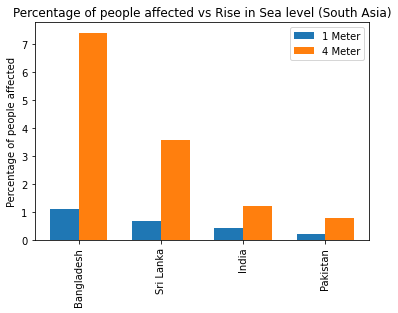

In [20]:
#South Asia - Population Affected

south_asia_pop["1 meter Percentage"] = (south_asia_pop["1 meter"]/south_asia_pop["Total Population"])*100
south_asia_pop["4 meter Percentage"] = (south_asia_pop["4 meter"]/south_asia_pop["Total Population"])*100
x =np.arange(len(list(south_asia_pop["Country Name"] )))
width=0.35


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, south_asia_pop["1 meter Percentage"], width, label='1 Meter')
rects2 = ax.bar(x + width/2, south_asia_pop["4 meter Percentage"], width, label='4 Meter')


ax.set_ylabel('Percentage of people affected')
ax.set_title("Percentage of people affected vs Rise in Sea level (South Asia)")
ax.set_xticks(x)

ax.set_xticklabels(list(south_asia_pop["Country Name"] ))
ax.legend()

plt.xticks(rotation=90)
plt.show()


In [21]:
latin_gdp = data.loc[215:239,["Country Name","Country Area (Sq. km.)","1 meter.1","4 meter.1"]]
latin_gdp.reset_index(drop=True,inplace=True)
latin_gdp.columns = ["Country Name","Total GDP (Millions)","1 meter","4 meter"]
latin_gdp = latin_gdp.loc[0:10,:]
latin_gdp["1 Meter Loss (in Millions of Dollors)"] = latin_gdp["1 meter"] * latin_gdp["Total GDP (Millions)"]
latin_gdp["4 Meter Loss (in Millions of Dollors)"] = latin_gdp["4 meter"] * latin_gdp["Total GDP (Millions)"]
print(latin_gdp)

          Country Name  Total GDP (Millions)   1 meter    4 meter  \
0            Argentina              439897.0  0.309618   1.839067   
1              Bahamas                4962.0  4.735994  18.681983   
2               Belize                1312.0  2.057927   7.926829   
3               Brazil             1233633.0  0.578292   1.752790   
4                Chile              135982.0  0.083099   0.221353   
5             Colombia              296427.0  0.200387   1.046801   
6           Costa Rica               38381.0  0.112035   0.388213   
7                 Cuba               19200.0  0.447917   5.203125   
8   Dominican Republic               57877.0  0.152047   1.257840   
9              Ecuador               40046.0  2.659442   5.596065   
10         El Salvador               32878.0  0.282864   0.754304   

    1 Meter Loss (in Millions of Dollors)  \
0                                136200.0   
1                                 23500.0   
2                                  2

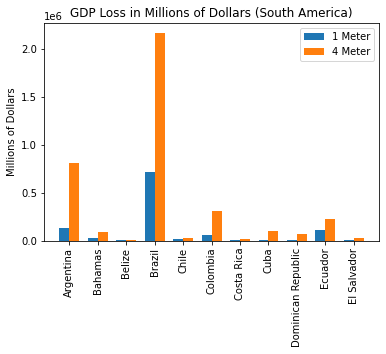

In [22]:
#South America - GDP Loss

x =np.arange(len(list(latin_gdp["Country Name"] )))
width=0.35


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, latin_gdp["1 Meter Loss (in Millions of Dollors)"], width, label='1 Meter')
rects2 = ax.bar(x + width/2, latin_gdp["4 Meter Loss (in Millions of Dollors)"], width, label='4 Meter')


ax.set_ylabel('Millions of Dollars')
ax.set_title("GDP Loss in Millions of Dollars (South America)")
ax.set_xticks(x)

ax.set_xticklabels(list(latin_gdp["Country Name"] ))
ax.legend()

plt.xticks(rotation=90)
plt.show()


In [23]:
middle_gdp = data.loc[215:239,["Country Name","Country Area (Sq. km.)","1 meter.1","4 meter.1"]]
middle_gdp.reset_index(drop=True,inplace=True)
middle_gdp.columns = ["Country Name","Total GDP (Millions)","1 meter","4 meter"]
middle_gdp = middle_gdp.loc[0:10,:]
middle_gdp["1 Meter Loss (in Millions of Dollors)"] = middle_gdp["1 meter"] * middle_gdp["Total GDP (Millions)"]
middle_gdp["4 Meter Loss (in Millions of Dollors)"] = middle_gdp["4 meter"] * middle_gdp["Total GDP (Millions)"]
print(middle_gdp)

          Country Name  Total GDP (Millions)   1 meter    4 meter  \
0            Argentina              439897.0  0.309618   1.839067   
1              Bahamas                4962.0  4.735994  18.681983   
2               Belize                1312.0  2.057927   7.926829   
3               Brazil             1233633.0  0.578292   1.752790   
4                Chile              135982.0  0.083099   0.221353   
5             Colombia              296427.0  0.200387   1.046801   
6           Costa Rica               38381.0  0.112035   0.388213   
7                 Cuba               19200.0  0.447917   5.203125   
8   Dominican Republic               57877.0  0.152047   1.257840   
9              Ecuador               40046.0  2.659442   5.596065   
10         El Salvador               32878.0  0.282864   0.754304   

    1 Meter Loss (in Millions of Dollors)  \
0                                136200.0   
1                                 23500.0   
2                                  2

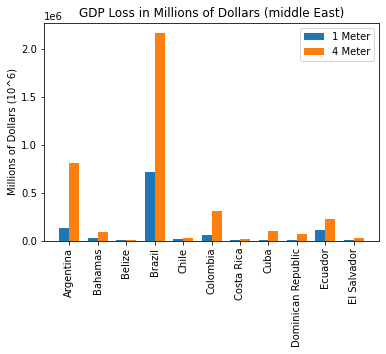

In [25]:
#Middle East - GDP Loss

x =np.arange(len(list(middle_gdp["Country Name"] )))
width=0.35


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, middle_gdp["1 Meter Loss (in Millions of Dollors)"], width, label='1 Meter')
rects2 = ax.bar(x + width/2, middle_gdp["4 Meter Loss (in Millions of Dollors)"], width, label='4 Meter')


ax.set_ylabel('Millions of Dollars (10^6)')
ax.set_title("GDP Loss in Millions of Dollars (middle East)")
ax.set_xticks(x)

ax.set_xticklabels(list(middle_gdp["Country Name"] ))
ax.legend()

plt.xticks(rotation=90)
plt.show()


In [29]:
east_asia_gdp = data.loc[294:306,["Country Name","Country Area (Sq. km.)","1 meter.1","4 meter.1"]]
east_asia_gdp.reset_index(drop=True,inplace=True)
east_asia_gdp.columns = ["Country Name","Total GDP (Millions)","1 meter","4 meter"]
east_asia_gdp = east_asia_gdp.loc[0:10,:]
east_asia_gdp["1 Meter Loss (in Millions of Dollors)"] = east_asia_gdp["1 meter"] * east_asia_gdp["Total GDP (Millions)"]
east_asia_gdp["4 Meter Loss (in Millions of Dollors)"] = east_asia_gdp["4 meter"] * east_asia_gdp["Total GDP (Millions)"]
print(east_asia_gdp)

        Country Name  Total GDP (Millions)   1 meter    4 meter  \
0    Myanmar (Burma)               63700.0  0.962323   7.161695   
1             Brunei                5900.0  0.000000   0.101695   
2           Cambodia               21106.0  1.056572   7.708708   
3              China             4724163.0  2.400214   8.251938   
4          Indonesia              613299.0  1.884562   7.055449   
5        North Korea               22000.0  0.100000   0.795455   
6        South Korea              691772.0  0.212209   0.895960   
7           Malaysia              211738.0  0.550208   3.474105   
8   Papua New Guinea               13927.0  0.057442   0.208229   
9        Philippines              290338.0  0.621689   3.390875   
10          Thailand              378476.0  1.419377  16.164565   

    1 Meter Loss (in Millions of Dollors)  \
0                                 61300.0   
1                                     0.0   
2                                 22300.0   
3              

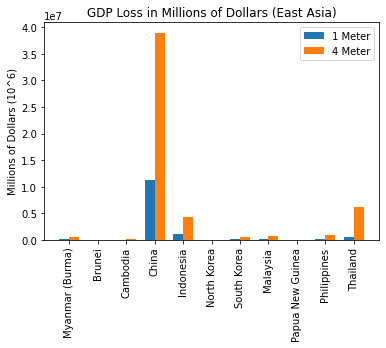

In [30]:
#East Asia - GDP Loss

x =np.arange(len(list(east_asia_gdp["Country Name"] )))
width=0.35


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, east_asia_gdp["1 Meter Loss (in Millions of Dollors)"], width, label='1 Meter')
rects2 = ax.bar(x + width/2, east_asia_gdp["4 Meter Loss (in Millions of Dollors)"], width, label='4 Meter')


ax.set_ylabel('Millions of Dollars (10^6)')
ax.set_title("GDP Loss in Millions of Dollars (East Asia)")
ax.set_xticks(x)

ax.set_xticklabels(list(east_asia_gdp["Country Name"] ))
ax.legend()

plt.xticks(rotation=90)
plt.show()


In [32]:
south_asia_gdp = data.loc[311:314,["Country Name","Country Area (Sq. km.)","1 meter.1","4 meter.1"]]
south_asia_gdp.reset_index(drop=True,inplace=True)
south_asia_gdp.columns = ["Country Name","Total GDP (Millions)","1 meter","4 meter"]
south_asia_gdp = south_asia_gdp.loc[0:10,:]
south_asia_gdp["1 Meter Loss (in Millions of Dollors)"] = south_asia_gdp["1 meter"] * south_asia_gdp["Total GDP (Millions)"]
south_asia_gdp["4 Meter Loss (in Millions of Dollors)"] = south_asia_gdp["4 meter"] * south_asia_gdp["Total GDP (Millions)"]
print(south_asia_gdp)

  Country Name  Total GDP (Millions)   1 meter   4 meter  \
0   Bangladesh              202087.0  0.938210  7.154344   
1    Sri Lanka               62726.0  0.452763  2.754839   
2        India             2772730.0  0.585091  2.073155   
3     Pakistan              258024.0  0.096890  0.463523   

   1 Meter Loss (in Millions of Dollors)  \
0                               189600.0   
1                                28400.0   
2                              1622300.0   
3                                25000.0   

   4 Meter Loss (in Millions of Dollors)  
0                              1445800.0  
1                               172800.0  
2                              5748300.0  
3                               119600.0  


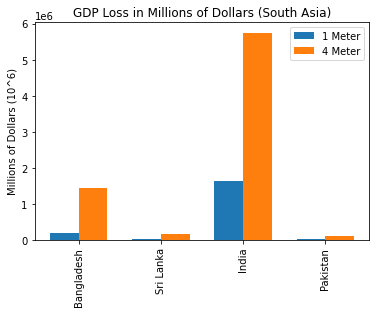

In [33]:
#South Asia - GDP Loss

x =np.arange(len(list(south_asia_gdp["Country Name"] )))
width=0.35


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, south_asia_gdp["1 Meter Loss (in Millions of Dollors)"], width, label='1 Meter')
rects2 = ax.bar(x + width/2, south_asia_gdp["4 Meter Loss (in Millions of Dollors)"], width, label='4 Meter')


ax.set_ylabel('Millions of Dollars (10^6)')
ax.set_title("GDP Loss in Millions of Dollars (South Asia)")
ax.set_xticks(x)

ax.set_xticklabels(list(south_asia_gdp["Country Name"] ))
ax.legend()

plt.xticks(rotation=90)
plt.show()
